## 数据透视表的概念

- 操作数据内部的关联性，常见于Excel与类似的表格应用中，数据透视表将每一列数据作为输入，输出将数据不断细分成多个维度累计信息的二维数据表，是一种多维的GroupBy累计操作

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
titanic = sns.load_dataset("titanic")

tianic.head()

URLError: <urlopen error [WinError 10060] 由于连接方在一段时间后没有正确答复或连接的主机没有反应，连接尝试失败。>

## 数据透视表的语法

- DataFrame的pivot_table方法的完整签名如下所示：
   Pandas 0.18版的函数签名
```python

DataFrame.pivot_table(data, values=None, index=None, columns=None,
                     aggfunc='mean',fill_value=None,margins=False,
                      dropna=True, margins_name='All')

```

- fill_value 和 dropna这两个参数用于处理缺失值，aggfunc参数用于设置累计函数类型，默认值是均值。与GroupBy的用法一样，累计函数可以用一些常见的字符串（'sum'、'mean'、'count'、'min'、'max'等）表示，也可以用标准的累计函数（np.sum()、min()、sum()等）表示。另外，还可以通过字典为不同的列指定不同的累计函数：

In [2]:
# 案例 美国人的生日

import pandas as pd

births = pd.read_csv('./data/births.csv')

births.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [3]:
# 可以用一个数据透视表来探索这份数据，先增加一列表示不同的年代

births['decade'] = 10 * (births['year'] // 10)
births.pivot_table('births', index='decade', columns='gender', aggfunc='sum')


gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


Text(0,0.5,'total births per year')

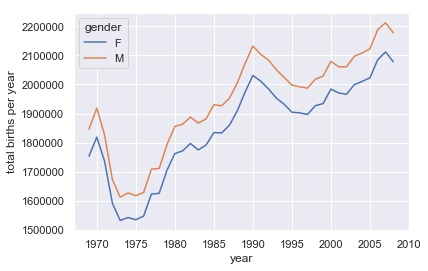

In [4]:
# 借助画图工具画出具体的图形

%matplotlib inline
import matplotlib.pyplot as plt
sns.set()  # 使用Seaborn风格
births.pivot_table('births', index='year', columns='gender', aggfunc='sum').plot()
plt.ylabel('total births per year')

# 向量化字符串操作

- 向量化操作简化了纯数值的数组操作语法--我们不在需要担心数组的长度或维度，只需关心需要的操作

In [5]:
import numpy as np
x = np.array([2, 3, 5, 7, 11, 13])
x * 2

array([ 4,  6, 10, 14, 22, 26])

In [6]:
 data = ['peter', 'Paul', 'MARY', 'gUIDO']
[s.capitalize() for s in data]

['Peter', 'Paul', 'Mary', 'Guido']

In [9]:
# 如果数据中出现了缺失值就会引起异常
data = ['peter', 'Paul',None ,'MARY', 'gUIDO']
[s.capitalize() for s in data]

AttributeError: 'NoneType' object has no attribute 'capitalize'

Pandas为包含字符串的Series和Index对象提供的str属性堪称两全其美的方法，它既可以满足向量化字符串操作的需求，又可以正确地处理缺失值。

In [11]:
import pandas as pd
data = ['peter', 'Paul',None, 'MARY', 'gUIDO']
names = pd.Series(data)
names

0    peter
1     Paul
2     None
3     MARY
4    gUIDO
dtype: object

In [12]:
# 调用方法
names.str.capitalize()

0    Peter
1     Paul
2     None
3     Mary
4    Guido
dtype: object

In [14]:
# pandas 字符串方法列表

monte = pd.Series(['Graham Chapman', 'John Cleese', 'Terry Gilliam',
                   'Eric Idle', 'Terry Jones', 'Michael Palin'])


# 与python字符串相似的方法


|             |                  |                  |                  |
|-------------|------------------|------------------|------------------|
|``len()``    | ``lower()``      | ``translate()``  | ``islower()``    | 
|``ljust()``  | ``upper()``      | ``startswith()`` | ``isupper()``    | 
|``rjust()``  | ``find()``       | ``endswith()``   | ``isnumeric()``  | 
|``center()`` | ``rfind()``      | ``isalnum()``    | ``isdecimal()``  | 
|``zfill()``  | ``index()``      | ``isalpha()``    | ``split()``      | 
|``strip()``  | ``rindex()``     | ``isdigit()``    | ``rsplit()``     | 
|``rstrip()`` | ``capitalize()`` | ``isspace()``    | ``partition()``  | 
|``lstrip()`` |  ``swapcase()``  |  ``istitle()``   | ``rpartition()`` |


lower()方法返回一个字符串Series()

In [15]:
monte.str.lower()

0    graham chapman
1       john cleese
2     terry gilliam
3         eric idle
4       terry jones
5     michael palin
dtype: object

In [16]:
monte.str.len()

0    14
1    11
2    13
3     9
4    11
5    13
dtype: int64

In [17]:
monte.str.startswith("T")

0    False
1    False
2     True
3    False
4     True
5    False
dtype: bool

In [18]:
monte.str.split()

0    [Graham, Chapman]
1       [John, Cleese]
2     [Terry, Gilliam]
3         [Eric, Idle]
4       [Terry, Jones]
5     [Michael, Palin]
dtype: object